In [1]:
from IPython.display import display

In [2]:
from MicroRegEx.Lexer import Lexer
from MicroRegEx.Parser import Parser
from MicroRegEx.PatternSyntaxError import PatternSyntaxError
from MicroRegEx.TokenToNFA import TokenToNFA

In [3]:
pattern = r"(a|b)cd*e?"

In [4]:
lexer = Lexer(pattern)
lexer.analyse()

In [5]:
lexer.get_tokens()

[Token(OPEN_PARENTHESIS, value=None),
 Token(CHARACTER, value=a),
 Token(BAR, value=None),
 Token(CHARACTER, value=b),
 Token(CLOSE_PARENTHESIS, value=None),
 Token(CHARACTER, value=c),
 Token(CHARACTER, value=d),
 Token(ASTERISK, value=None),
 Token(CHARACTER, value=e),
 Token(QUESTION, value=None)]

In [6]:
parser = Parser(lexer)
postfix_expr = parser.parse()

In [7]:
postfix_expr

[Token(CHARACTER, value=a),
 Token(CHARACTER, value=b),
 Token(BAR, value=None),
 Token(CHARACTER, value=c),
 Token(CHARACTER, value=d),
 Token(ASTERISK, value=None),
 Token(CHARACTER, value=e),
 Token(QUESTION, value=None),
 Token(concatenate, value=None),
 Token(concatenate, value=None),
 Token(concatenate, value=None)]

In [8]:
nfa_stack = TokenToNFA(postfix_expr).translate()

In [9]:
if len(nfa_stack) != 1:
    raise PatternSyntaxError

automaton = nfa_stack[0]

In [10]:
automaton

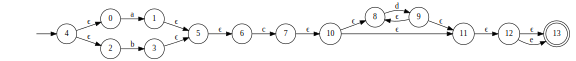

In [11]:
graph = automaton.get_graph()
graph

In [12]:
result = automaton.match("abcde")
result

False

{<MicroRegEx.Automaton.Status.Status object at 0x7f9dc423f588>, <MicroRegEx.Automaton.Status.Status object at 0x7f9dc423f710>, <MicroRegEx.Automaton.Status.Status object at 0x7f9dc423f668>}


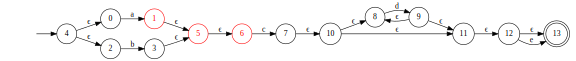

set()


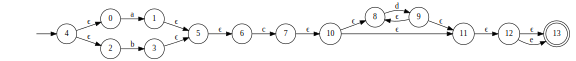

set()


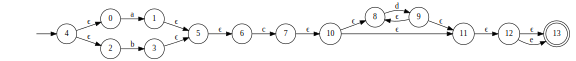

set()


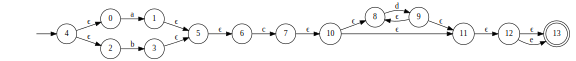

set()


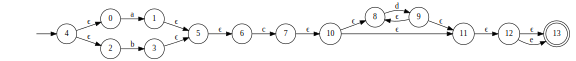

In [13]:
for s in automaton.match_step_by_step("abcde"):
    graph = automaton.get_graph(automaton.current_status)
    display(graph)

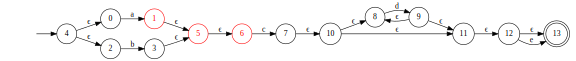

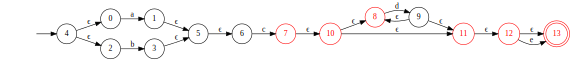

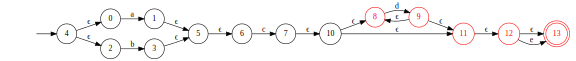

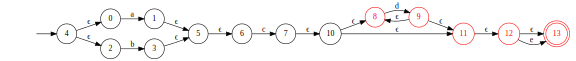

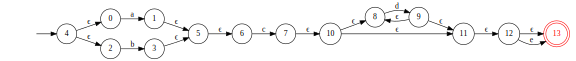

In [14]:
for s in automaton.match_step_by_step("acdde"):
    graph = automaton.get_graph(automaton.current_status)
    display(graph)